### Diabetes_Prediction 
    In this project we are going to perform prediction of diabetes using PIMA Diabetes Data for which we are going implement several Machine learning models and get the best model fit to the dataset.
    DataSet link: 
https://www.kaggle.com/uciml/pima-indians-diabetes-database
> In this we are going to follow several steps such as
> 1. Data Acquisition
> 2. Data Analysis
> 3. Data missing value imputation
> 4. Models Implementation
> 5. Models Accuracy measurement
> 6. Plotting visuals of prediction.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (14, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df=pd.read_csv('diabetes.csv',header=0)

In [ ]:
df.head(10)

### Data Analysis

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
print('No of Diabetes affected patients in given dataset :',len(df.loc[df['Outcome']==1]))
print('No of non affected patients with diabetes in given dataset :',len(df.loc[df['Outcome']==0]))

No of Diabetes affected patients in given dataset : 268
No of non affected patients with diabetes in given dataset : 500


In [8]:
df.duplicated().sum()

0

### Finding missing values
> In this dataset we have missing values filled as zeros.

In [9]:
print("total number of rows : {0}".format(len(df)))
for col in df.columns:
    print("number of rows missing {}: {}".format(col,len(df.loc[df[col] == 0])))

total number of rows : 768
number of rows missing Pregnancies: 111
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing Outcome: 500


>In general Pregnancies and variable can contain zero value.

>The remaining columns containing zeros are to be imputed with the mean values which we have performed in the next cell.

In [82]:
df.Glucose[df['Glucose']==0]=df.Glucose.mean()
df.BloodPressure[df['BloodPressure']==0]=df.BloodPressure.mean()
df.SkinThickness[df['SkinThickness']==0]=df.SkinThickness.mean()
df.Insulin[df['Insulin']==0]=df.Insulin.mean()
df.BMI[df['BMI']==0]=df.BMI.mean()


In [83]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'correlation_matrix')

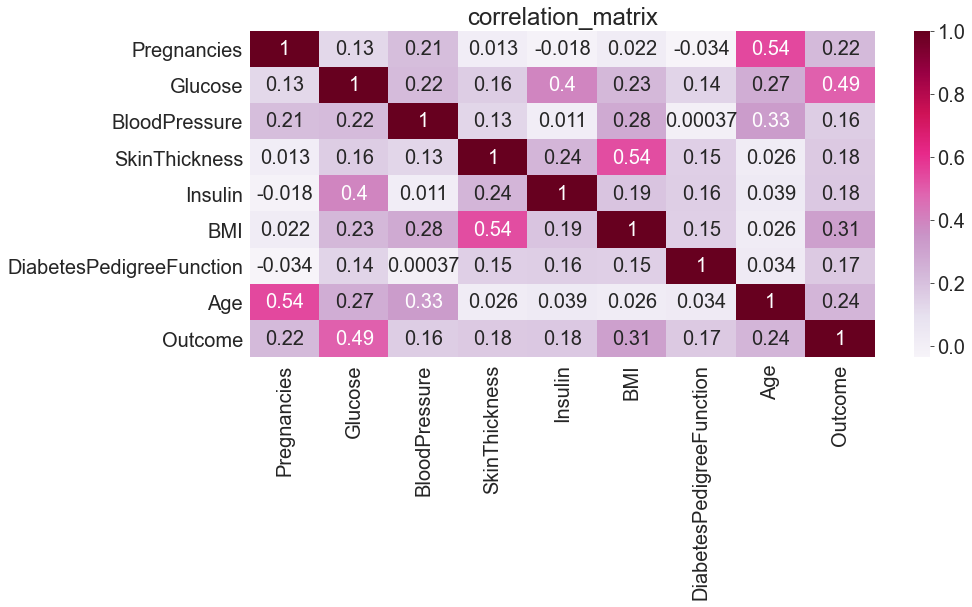

In [84]:
#### Correlation Analysis
sns.heatmap(df.corr(),annot=True,cmap='PuRd')
plt.title('correlation_matrix')

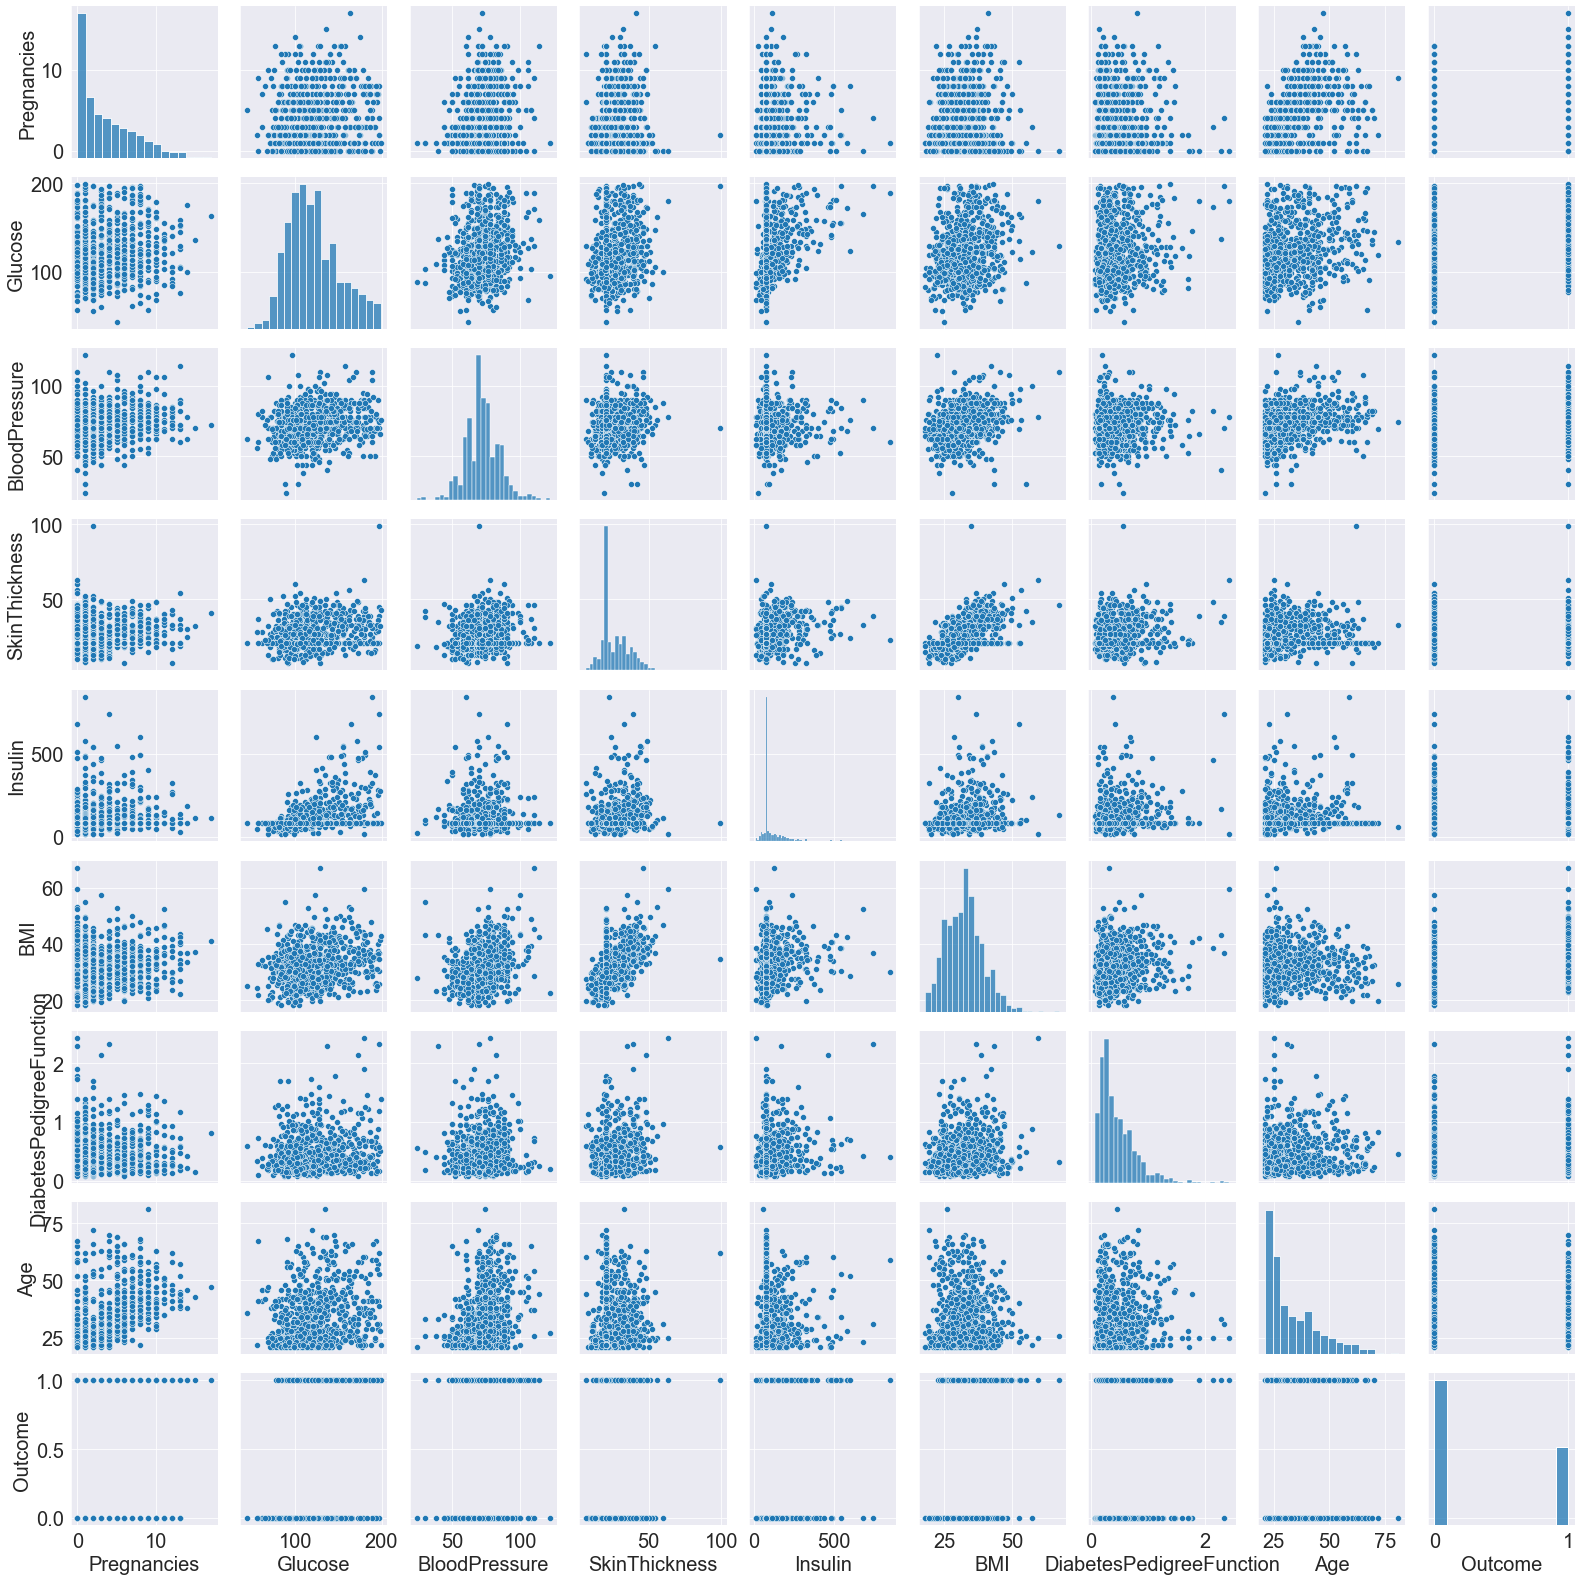

In [117]:
sns.pairplot(data=df)

<AxesSubplot:>

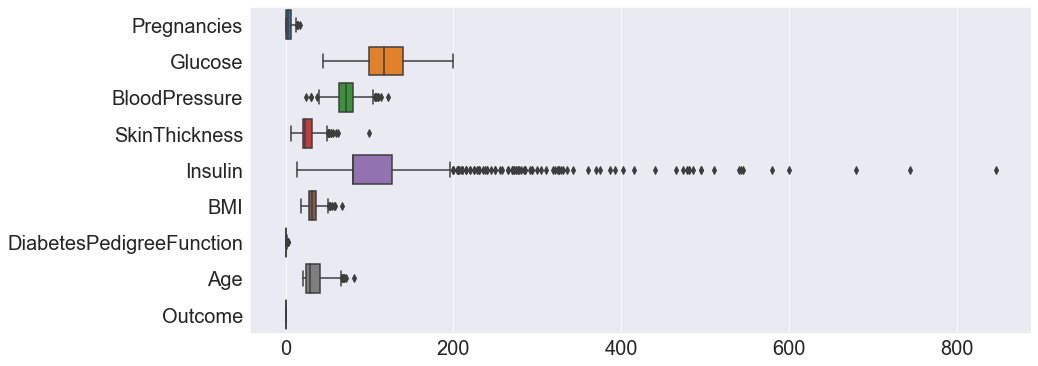

In [85]:
### Checking for Outliers.
sns.boxplot(data=df,orient='h')

<AxesSubplot:title={'center':'Prevalence of diabetes by Age'}, xlabel='Age', ylabel='Count'>

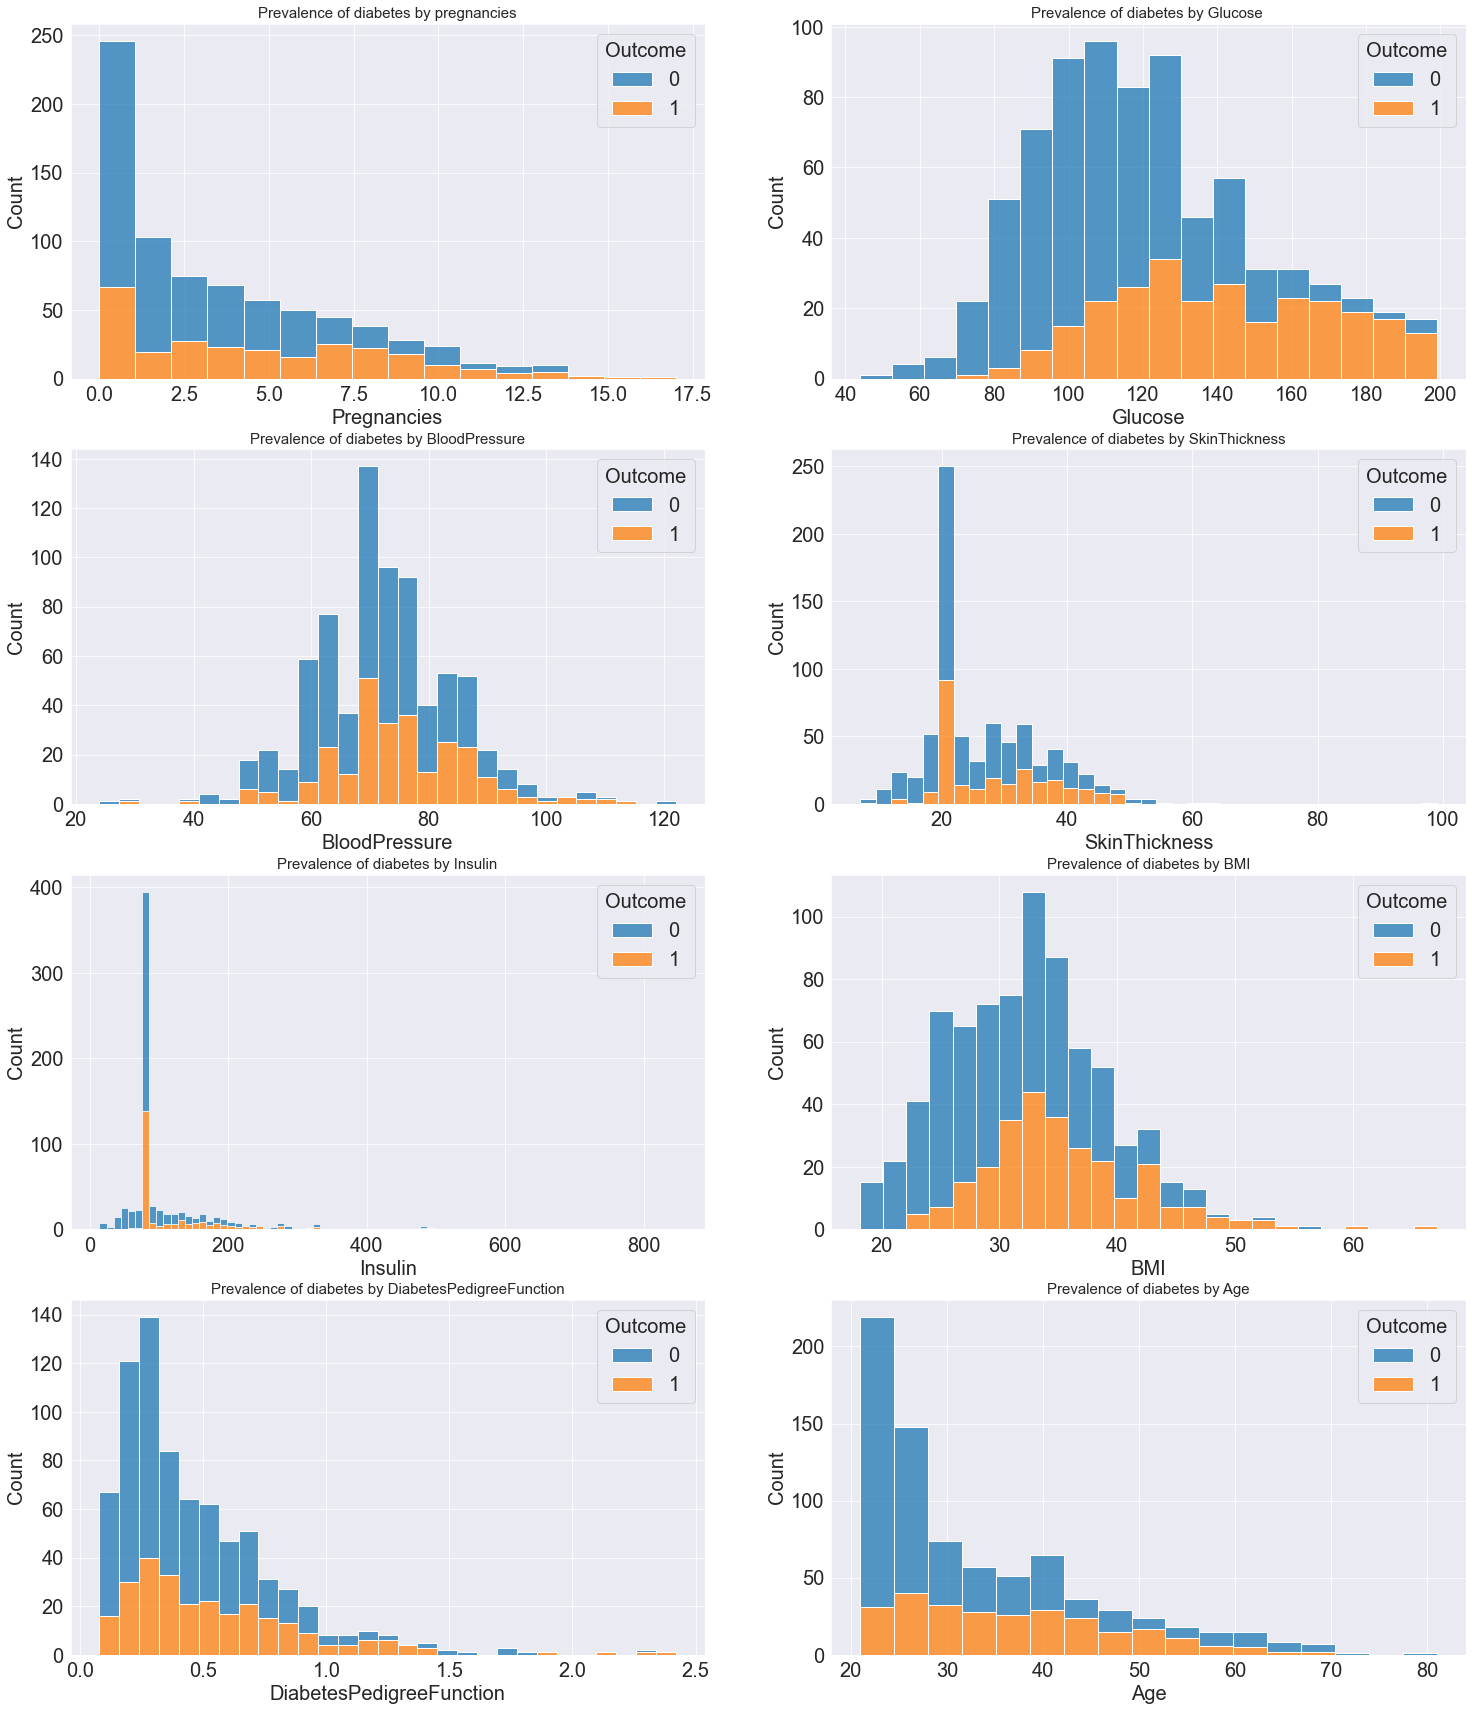

In [86]:
plt.figure(figsize=(25,30))
plt.subplot(4,2,1)
plt.title('Prevalence of diabetes by pregnancies',fontsize=15)
sns.histplot(x = df['Pregnancies'], hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,2)
plt.title('Prevalence of diabetes by Glucose ',fontsize=15)
sns.histplot(x = df['Glucose'], hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,3)
plt.title('Prevalence of diabetes by BloodPressure',fontsize=15)
sns.histplot(x = df['BloodPressure'], hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,4)
plt.title('Prevalence of diabetes by SkinThickness',fontsize=15)
sns.histplot(x = df['SkinThickness'],hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,5)
plt.title('Prevalence of diabetes by Insulin',fontsize=15)
sns.histplot(x = df['Insulin'],hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,6)
plt.title('Prevalence of diabetes by BMI',fontsize=15)
sns.histplot(x = df['BMI'],hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,7)
plt.title('Prevalence of diabetes by DiabetesPedigreeFunction',fontsize=15)
sns.histplot(x = df['DiabetesPedigreeFunction'],hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,8)
plt.title('Prevalence of diabetes by Age',fontsize=15)
sns.histplot(x = df['Age'],hue = df['Outcome'],multiple="stack")

In general, 20 to 45 aged people have more chance of Diabetes.

Blood pressure 60 to 80

skin thickness with 20 have more chances

insulin with around 80 have more chances

BMI > 30 

Diabetiespedegreefunction with 0.1 to 0.7

zero pregnensies have more chances

glucose > 110

#### x-y split

In [87]:
x=df.drop(['Outcome'],axis=1)

In [88]:
y=df['Outcome']

#### Train_Test_Split

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [90]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(614, 8) (154, 8) (614,) (154,)


#### Models Implementation

In [91]:
## scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(x_train)

In [92]:
x_train   #### Before scaling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150.0,78.000000,29.000000,126.000000,35.200000,0.692,54
118,4,97.0,60.000000,23.000000,79.799479,28.200000,0.443,22
247,0,165.0,90.000000,33.000000,680.000000,52.300000,0.427,23
157,1,109.0,56.000000,21.000000,135.000000,25.200000,0.833,23
468,8,120.0,69.105469,20.536458,79.799479,30.000000,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101.0,76.000000,48.000000,180.000000,32.900000,0.171,63
192,7,159.0,66.000000,20.536458,79.799479,30.400000,0.383,36
629,4,94.0,65.000000,22.000000,79.799479,24.700000,0.148,21
559,11,85.0,74.000000,20.536458,79.799479,30.100000,0.300,35


In [93]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)
x_train_sc      ### AFTER SCALING

array([[ 0.90832902,  0.93644016,  0.45816047, ...,  0.36864973,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.81628595, -1.03864035, ..., -0.63292879,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.43249471,  1.45602768, ...,  2.81536295,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.91549686, -0.62286235, ..., -1.13371805,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.2131296 ,  0.12553806, ..., -0.36107176,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.4734559 ,  0.79078287, ..., -0.09027668,
         0.52121586,  2.94889395]])

In [94]:
### Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [95]:
key = ['LogisticRegression','LinearDiscriminantAnalysis','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
value = [LogisticRegression(),LinearDiscriminantAnalysis(),KNeighborsClassifier(n_neighbors=3),SVC(),DecisionTreeClassifier(splitter='best'),RandomForestClassifier(),xgboost.XGBClassifier()]
models = dict(zip(key,value))
print(models)

{'LogisticRegression': LogisticRegression(), 'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(), 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=3), 'SVC': SVC(), 'DecisionTreeClassifier': DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier(), 'XGBClassifier': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)}


In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [97]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)

[19:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [98]:
df_accuracy=pd.DataFrame({'algo_name':key,
            'accuracy':predicted})
df_accuracy

,algo_name,accuracy
0,LogisticRegression,0.831169
1,LinearDiscriminantAnalysis,0.811688
2,KNeighborsClassifier,0.740260
3,SVC,0.792208
4,DecisionTreeClassifier,0.753247
5,RandomForestClassifier,0.798701
6,XGBClassifier,0.824675


In [99]:
df_accuracy.loc[df_accuracy['accuracy']==max(predicted)]

,algo_name,accuracy
0,LogisticRegression,0.831169


In [100]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

> Maximum acuuracy is shown by RandomForestClassifier

#### HyperParameter Tuning highest scorer logistic regression model

In [101]:
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [102]:
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca),
                       ('logistic_Reg',LogisticRegression())])

In [103]:
n_components = list(range(1,x.shape[1]+1,1))
penalty = ['l1', 'l2']

In [104]:
 params = dict(pca__n_components=n_components,
                logistic_Reg__penalty=penalty)

In [105]:
lr_clf_GS = GridSearchCV(pipe, params,scoring='accuracy')
lr_clf_GS.fit(x_train_sc, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [106]:
accuracy_score(y_test,lr_clf_GS.best_estimator_.predict(x_test_sc))

0.8181818181818182

> Accuracy Score of Grid Search Cross Validation of the Logistic Regression is less compared to the model while considered the default parameters. It might be a reason that the hyperparamters we considered might not be as same of the default in grid.

### Accuracy testing.

In [107]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
lr_clf=LogisticRegression(C=1)
lr_clf.fit(x_train_sc,y_train)

LogisticRegression(C=1)

Text(0.5, 1.0, 'ROC_Curve for LogisticRegression Model')

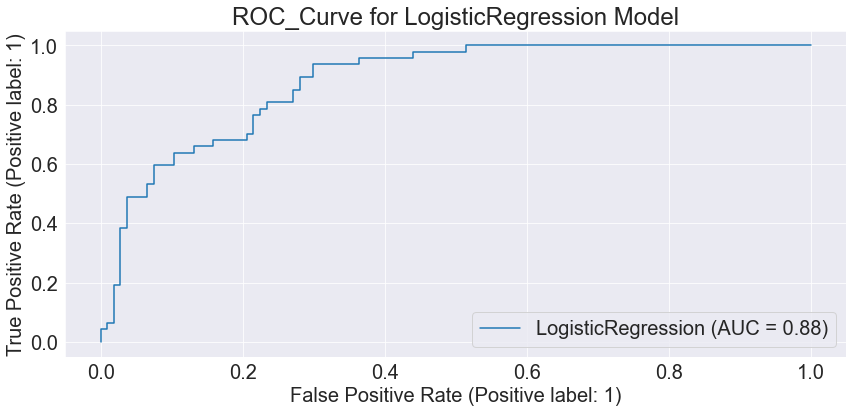

In [118]:
plot_roc_curve(lr_clf,x_test_sc,y_test)
plt.title('ROC_Curve for LogisticRegression Model')

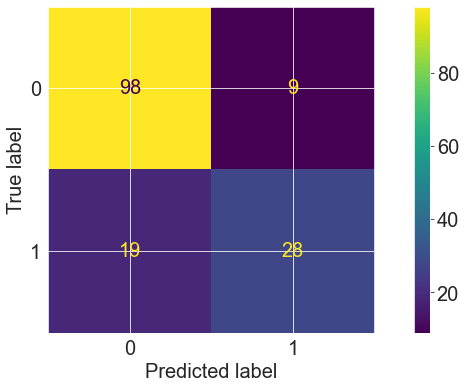

In [109]:
plot_confusion_matrix(lr_clf,x_test_sc,y_test)

In [110]:
df_accuracy.loc[df_accuracy['accuracy']==max(predicted)]

,algo_name,accuracy
0,LogisticRegression,0.831169


In [111]:
# prediction of the Outcome by using the best fit model.
Outcome_prediction=lr_clf.predict(x_test_sc)
Outcome_prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [112]:
y_test.values

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [113]:
predicted_df=pd.DataFrame({'Outcome_TRUE':y_test,
                          'Outcome_Pred':Outcome_prediction})

In [114]:
predicted_df.head(10)

,Outcome_TRUE,Outcome_Pred
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
103,0,0
338,1,1
588,1,1
395,0,0
204,0,0


In [115]:
predicted_df.tail(10)

,Outcome_TRUE,Outcome_Pred
64,1,0
671,0,0
52,0,0
310,0,0
416,0,0
476,1,0
482,0,0
230,1,1
527,0,0
380,0,0


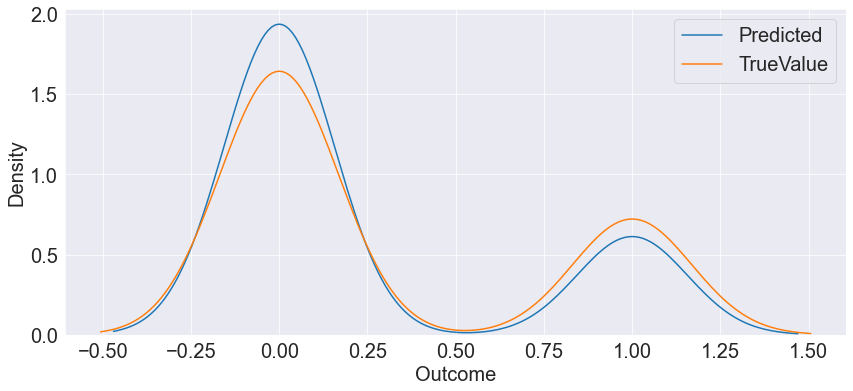

In [116]:
sns.distplot(Outcome_prediction,label='Predicted',hist=False)
sns.distplot(y_test,label='TrueValue',hist=False)
plt.legend()

#### Thus we have performed a model for predicting diabetes using PIMA Diabetes DataSet with an testing accuracy of 83.11%. 